importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importing required libraries for REGRESSION

In [2]:
import statsmodels.api as sm

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Inspecting data

In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


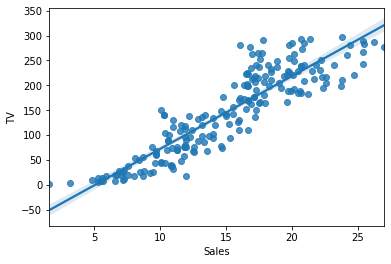

In [53]:
sns.regplot(x='Sales',y='TV',data=df) #regression plot
plt.show()   

regression plot shows liner relation between TV and Sales and Data points almost hugging to the fitted line. 

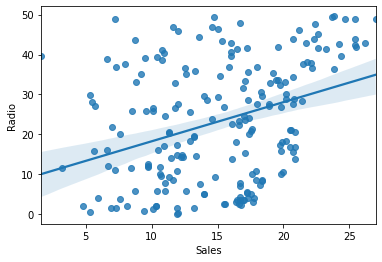

In [20]:
sns.regplot(x='Sales',y='Radio',data=df)
plt.show()

No relation can be seen

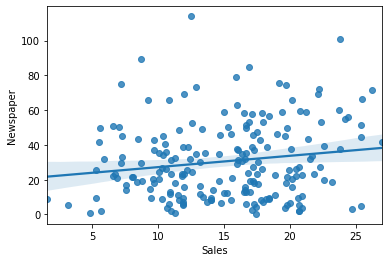

In [19]:
sns.regplot(x='Sales',y='Newspaper',data=df)
plt.show()

No relation can be seen

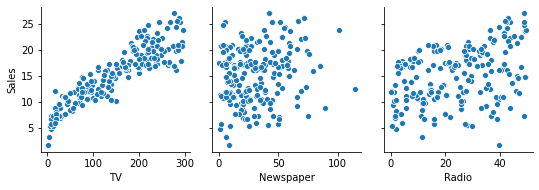

In [18]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()

Scatter plot also shows relation between Tv and Sales

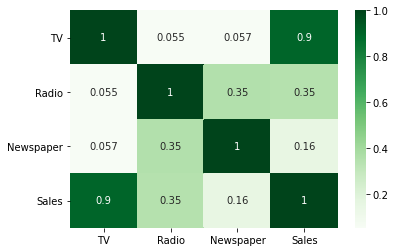

In [54]:
sns.heatmap(df.corr(),annot=True,cmap='Greens') #confirming further relation between Tv and Sales.
plt.show()

heat map shows strong relation between TV and Sales

In [25]:
X=df['TV']
y=df['Sales']

As Tv is showing strong linear relationship with Sales we take X as TV (Predictor/Independent Variable) and y as Sales (Dependent Variable) 

In [28]:
X.sample(5)

3      151.5
28     248.8
109    255.4
116    139.2
192     17.2
Name: TV, dtype: float64

In [29]:
y.sample(5)

77     14.2
128    24.7
164    11.9
31     11.9
92     19.4
Name: Sales, dtype: float64

In [36]:
#Splitting the whole data set into train and test by 70-30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [37]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [39]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [43]:
# As statsmodels ignors constant(c) in y=mx+c equation we need to add constant to X_tarin explicitly.    
X_train_sm=sm.add_constant(X_train)

In [45]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


Fit the resgression line using 'Ordinayr Least Squares'

In [66]:
#creates linear regression object 
lr = sm.OLS(y_train,X_train_sm) # havent learned model

In [68]:
lr_model=lr.fit() #use object lr and fit it

In [69]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [70]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 08 Jan 2021   Prob (F-statistic):           1.52e-52
Time:                        14:13:06   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""